# Geometric Brownian Motion

In this notebook, I go onto create a Geometric Brownian Motion model to make a prediction on future stock prices. I am using the Yahoo Finance API for my data. I am also using Google's closing prices as my example data for my model. I check for the normality of the returns using a QQ-plot to see whether a GBM is a good approach. I then create a function to generalize to other stocks and timelines.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import yfinance

### First Check for Normality of Google Returns

Text(0.5, 1.0, 'QQplot for Normality Check of Data')

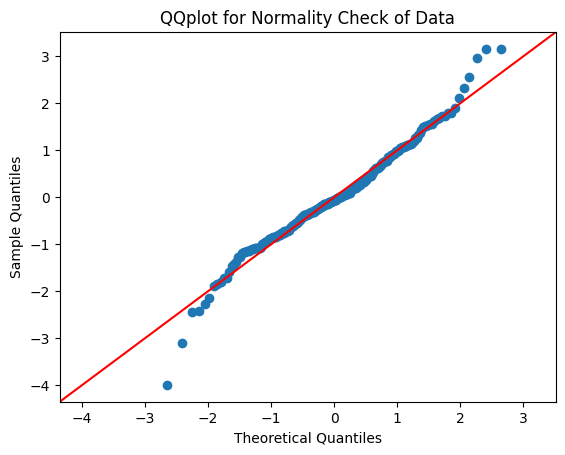

In [11]:
stock ="GOOG"
goog = yfinance.Ticker(stock).history(period="1y")['Close']
rgoog = goog.pct_change().fillna(0)[1:] + 1
sm.qqplot(rgoog, fit = True, line = "45")
plt.title("QQplot for Normality Check of Data")

### Geometric Brownian Motion Model for One Year of Google Returns

Text(0.5, 1.0, 'GBM Model of Ticker GOOG')

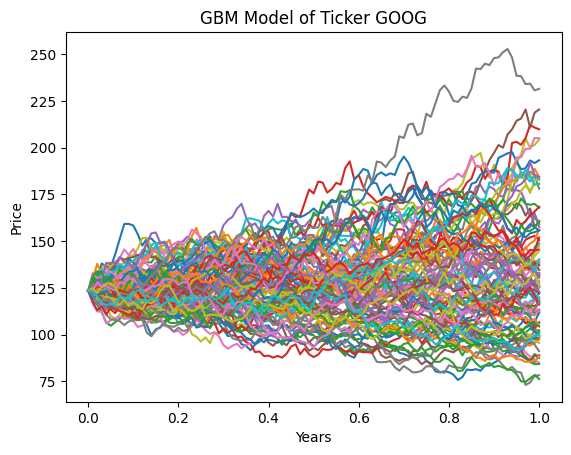

In [12]:
ln_mean = np.mean(np.log(rgoog))
ln_sd = np.std(np.log(rgoog))
years = 1
sims = 100
S0 = goog[-1]
steps = 100
dt = years/steps
sigma = ln_sd * np.sqrt(1/dt)
mu = ln_mean / dt + sigma ** 2 / 2


St = np.exp((mu -sigma ** 2 / 2) * dt + sigma * np.random.normal(0, np.sqrt(dt), size = (sims,steps)).T)
St = np.vstack([np.ones(sims), St])
St = S0 * St.cumprod(axis=0)

time = np.linspace(0,years,steps+1)
tt = np.full(shape=(sims,steps+1), fill_value=time).T

plt.plot(tt, St)
plt.xlabel('Years')
plt.ylabel('Price')
plt.title(f"GBM Model of Ticker {stock}")

### Calculation of Mean, Standard Deviation and Confidence Interval of Predictions

In [13]:
last_date = St.shape[0]
last_prices = St[last_date - 1]
mean = np.mean(last_prices)
sd = np.std(last_prices)

CI = [np.percentile(last_prices, 2.5),np.percentile(last_prices, 97.5)]
print(f"Mean =  {mean}")
print(f"Standard Deviation = {sd}")
print(f"Confidence Interval = {CI}")

Mean =  132.41684237532334
Standard Deviation = 33.09022045159344
Confidence Interval = [84.56544745885262, 207.51270042542808]


### Function for All Tickers in Yfinance and Varying Periods

In [16]:

def stockpred (stock,years = 1, dt = 0.01, sims = 1000):
    stock = yfinance.Ticker(stock).history(period="1y")['Close']
    rstock = stock.pct_change().fillna(0)[1:] + 1
    ln_mean = np.mean(np.log(rstock))
    ln_sd = np.std(np.log(rstock))
    S0 = stock[-1]
    steps = int(years/dt)
    sigma = ln_sd * np.sqrt(1/dt)
    mu = ln_mean / dt + sigma ** 2 / 2


    St = np.exp((mu -sigma ** 2 / 2) * dt + sigma * np.random.normal(0, np.sqrt(dt), size = (sims,steps)).T)
    St = np.vstack([np.ones(sims), St])
    St = S0 * St.cumprod(axis=0)

    last_date = St.shape[0]
    last_prices = St[last_date - 1]
    mean = np.mean(last_prices)
    sd = np.std(last_prices)
    CI = [np.round(np.percentile(last_prices, 2.5),2),np.round(np.percentile(last_prices, 97.5),2)]
    
    print(f"Last close = ${np.round(S0, 2)}")
    print(f"Mean prediction after {years} years = ${np.round(mean,2)}")
    print(f"Standard Deviation of the Prediction = ${np.round(sd,2)}")
    print(f"95% Confidence Interval = {CI}")

stockpred("MSFT", years = 1/12)

Last close = $318.52
Mean prediction after 0.08333333333333333 years = $321.38
Standard Deviation of the Prediction = $18.74
95% Confidence Interval = [286.42, 359.34]
